# **Loading Dataset**

In [1]:
import zipfile
import os

def unzip_dataset(zip_file_path, extract_to_dir):
    """
    Unzips a dataset from a ZIP file to a specified directory.

    :param zip_file_path: Path to the ZIP file.
    :param extract_to_dir: Directory to extract the contents to.
    """
    # Check if the ZIP file exists
    if not os.path.isfile(zip_file_path):
        raise FileNotFoundError(f"The file {zip_file_path} does not exist.")

    # Create the directory if it doesn't exist
    if not os.path.exists(extract_to_dir):
        os.makedirs(extract_to_dir)

    # Extract the contents of the ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_dir)
        print(f"Dataset extracted to {extract_to_dir}")

# Example usage
zip_file_path = '/content/cyberdata.zip'
extract_to_dir = 'extracted_cyber_dataset2'

unzip_dataset(zip_file_path, extract_to_dir)


Dataset extracted to extracted_cyber_dataset2


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("/content/extracted_cyber_dataset2/anz.csv")

In [4]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# **Exploratory Data Analysis**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataframe
print("\nBasic information about the dataframe:")
df.info()



Basic information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-nu

In [6]:
df.drop(columns=['merchant_code','bpay_biller_code','status','currency','country'], inplace=True)



In [7]:
df.describe()

,card_present_flag,balance,age,amount
count,7717.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,14704.195553,30.582330,187.933588
std,0.398029,31503.722652,10.046343,592.599934
min,0.000000,0.240000,18.000000,0.100000
25%,1.000000,3158.585000,22.000000,16.000000
50%,1.000000,6432.010000,28.000000,29.000000
75%,1.000000,12465.945000,38.000000,53.655000
max,1.000000,267128.520000,78.000000,8835.980000


In [8]:
# Display summary statistics for categorical columns
print("\nSummary statistics for categorical columns:")
df.describe(include=['O'])


Summary statistics for categorical columns:


,account,long_lat,txn_description,merchant_id,first_name,date,gender,merchant_suburb,merchant_state,extraction,transaction_id,customer_id,merchant_long_lat,movement
count,12043,12043,12043,7717,12043,12043,12043,7717,7717,12043,12043,12043,7717,12043
unique,100,100,6,5725,80,91,2,1609,8,9442,12043,100,2703,2
top,ACC-1598451071,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,Michael,9/28/2018,M,Melbourne,NSW,2018-09-03T11:00:00.000+0000,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,151.21 -33.87,debit
freq,578,578,3934,14,746,174,6285,255,2169,10,1,578,145,11160


In [9]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
card_present_flag    4326
account                 0
long_lat                0
txn_description         0
merchant_id          4326
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
customer_id             0
merchant_long_lat    4326
movement                0
dtype: int64


In [10]:
# Check for duplicated rows
print("\nNumber of duplicated rows:")
print(df.duplicated().sum())

# Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)


Number of duplicated rows:
0

Data types of each column:
card_present_flag    float64
account               object
long_lat              object
txn_description       object
merchant_id           object
first_name            object
balance              float64
date                  object
gender                object
age                    int64
merchant_suburb       object
merchant_state        object
extraction            object
amount               float64
transaction_id        object
customer_id           object
merchant_long_lat     object
movement              object
dtype: object


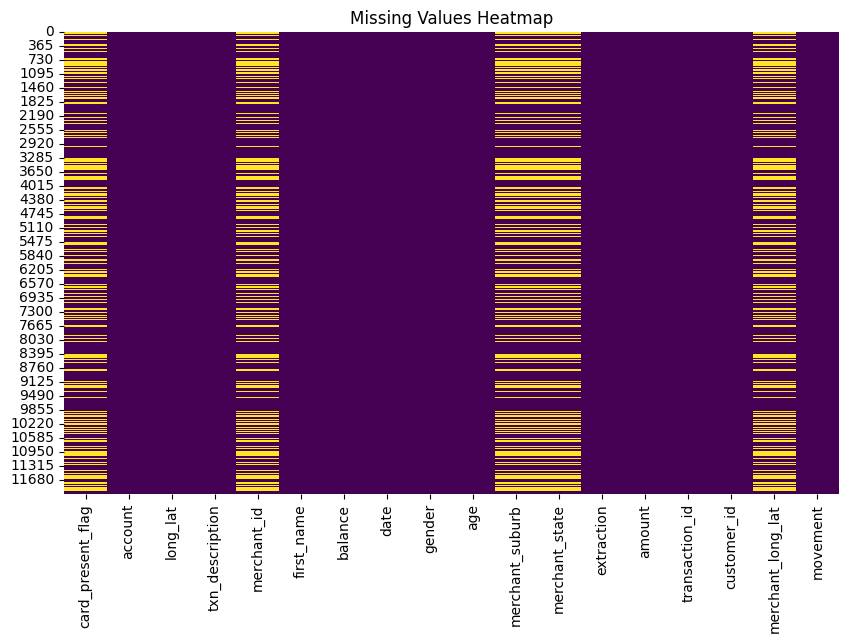

In [11]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

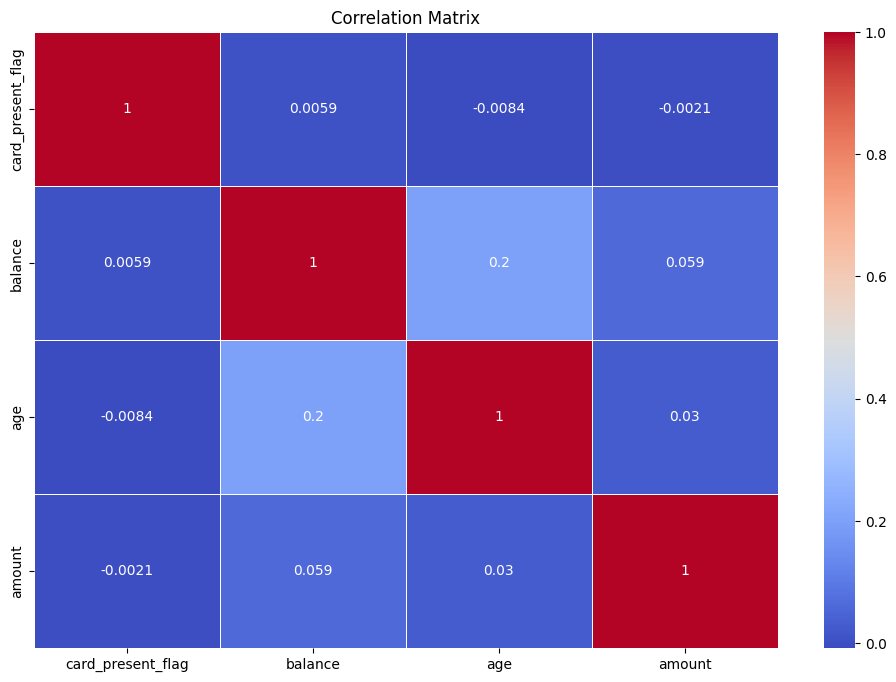

In [12]:

# Ensure we only use numerical columns for correlation matrix
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Correlation matrix for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


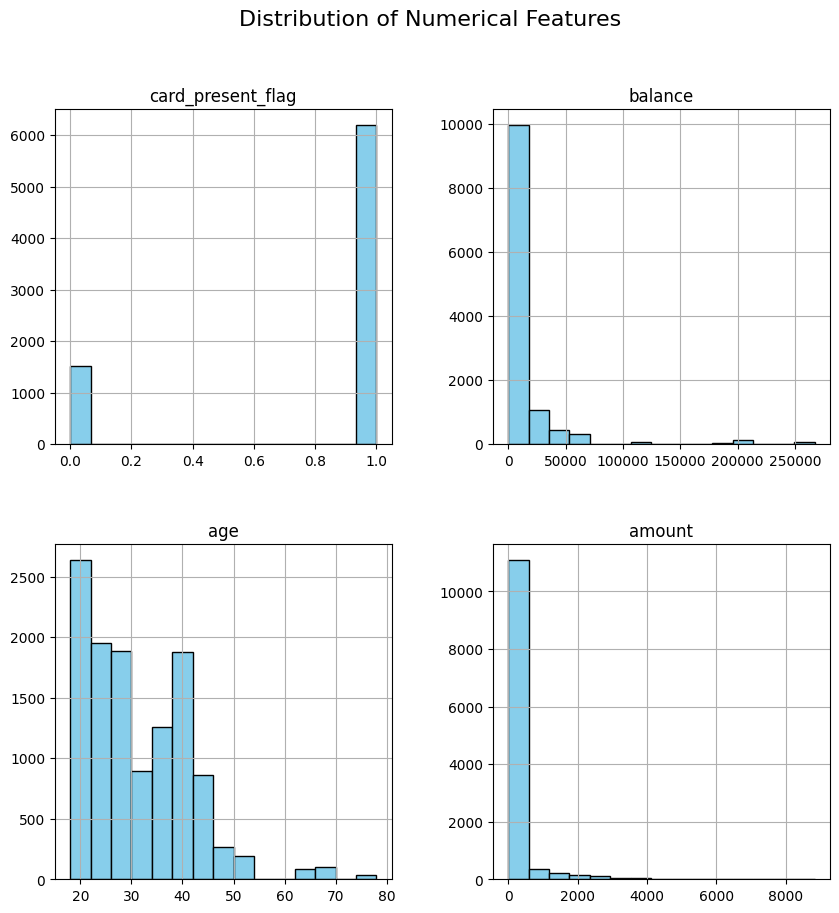

In [13]:

# Distribution of numerical features
df[numerical_columns].hist(figsize=(10, 10), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


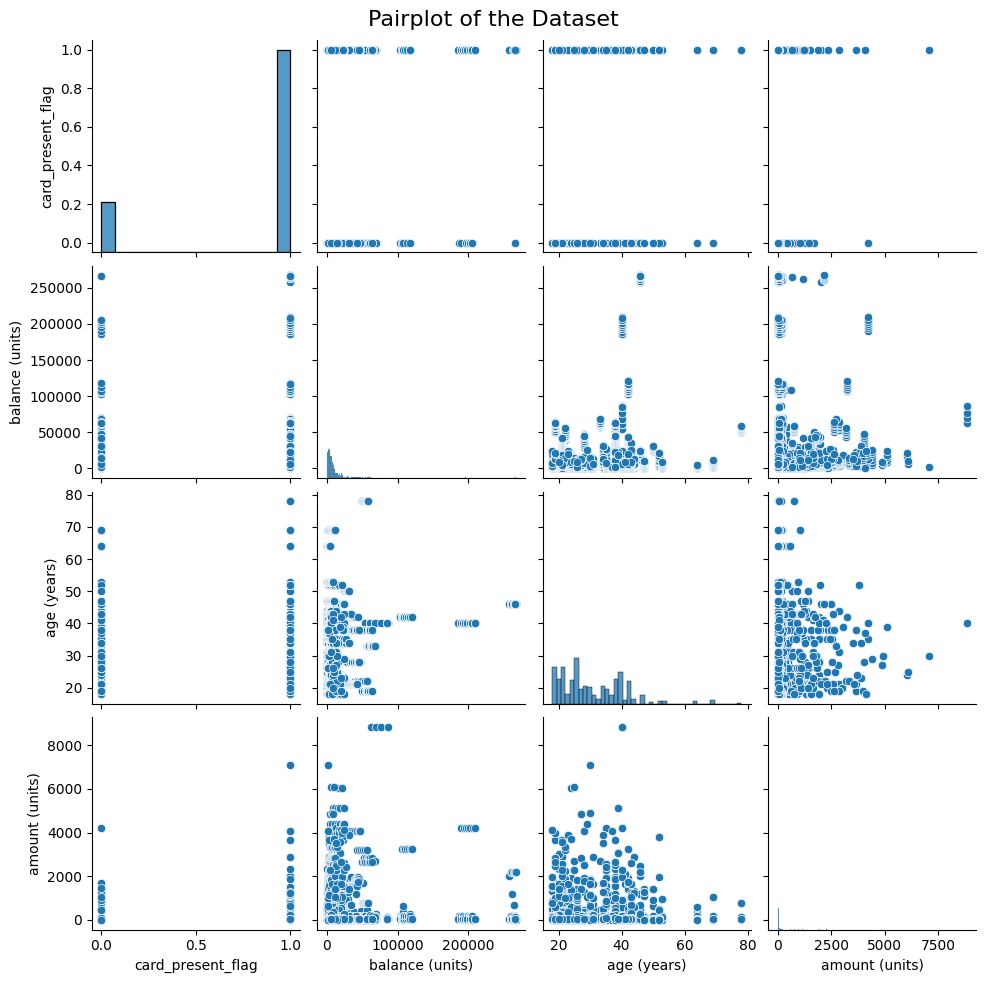

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Create the pairplot
pairplot_fig = sns.pairplot(df[numerical_columns])

# Add a supertitle
pairplot_fig.fig.suptitle('Pairplot of the Dataset', fontsize=16)

# Adjust the position of the supertitle
pairplot_fig.fig.subplots_adjust(top=0.95)  # Adjust this value as needed

# Define units for each numerical column (customize as per your data)
units = {
    'account': 'units',  # replace 'units' with actual unit if any
    'long_lat': 'units',
    'balance': 'units',
    'amount': 'units',
    'age': 'years'
}

# Add units to the axis labels
for ax in pairplot_fig.axes.flatten():
    xlabel = ax.get_xlabel()
    ylabel = ax.get_ylabel()
    if xlabel in units:
        ax.set_xlabel(f"{xlabel} ({units[xlabel]})")
    if ylabel in units:
        ax.set_ylabel(f"{ylabel} ({units[ylabel]})")

# Show the plot
plt.show()


# **Data preprocessing**

**Handling nulls**

In [15]:
df = df.dropna()

In [16]:
df.shape

(7717, 18)

**Label encoding**

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [18]:
df.head()

,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
0,1.0,17,97,0,2835,20,35.39,31,0,26,52,3,0,16.25,5064,46,2592,0
1,0.0,17,97,1,2857,20,21.20,31,0,26,1380,1,1,14.19,601,46,2021,0
2,1.0,4,84,0,2863,52,5.71,31,1,38,1380,1,2,6.42,7684,36,2021,0
3,1.0,0,95,1,1542,61,2117.22,31,0,40,214,3,3,40.90,1223,18,2353,0
4,1.0,17,97,1,4008,20,17.95,31,0,26,902,3,4,3.25,1603,46,2658,0


**Feature extraction**

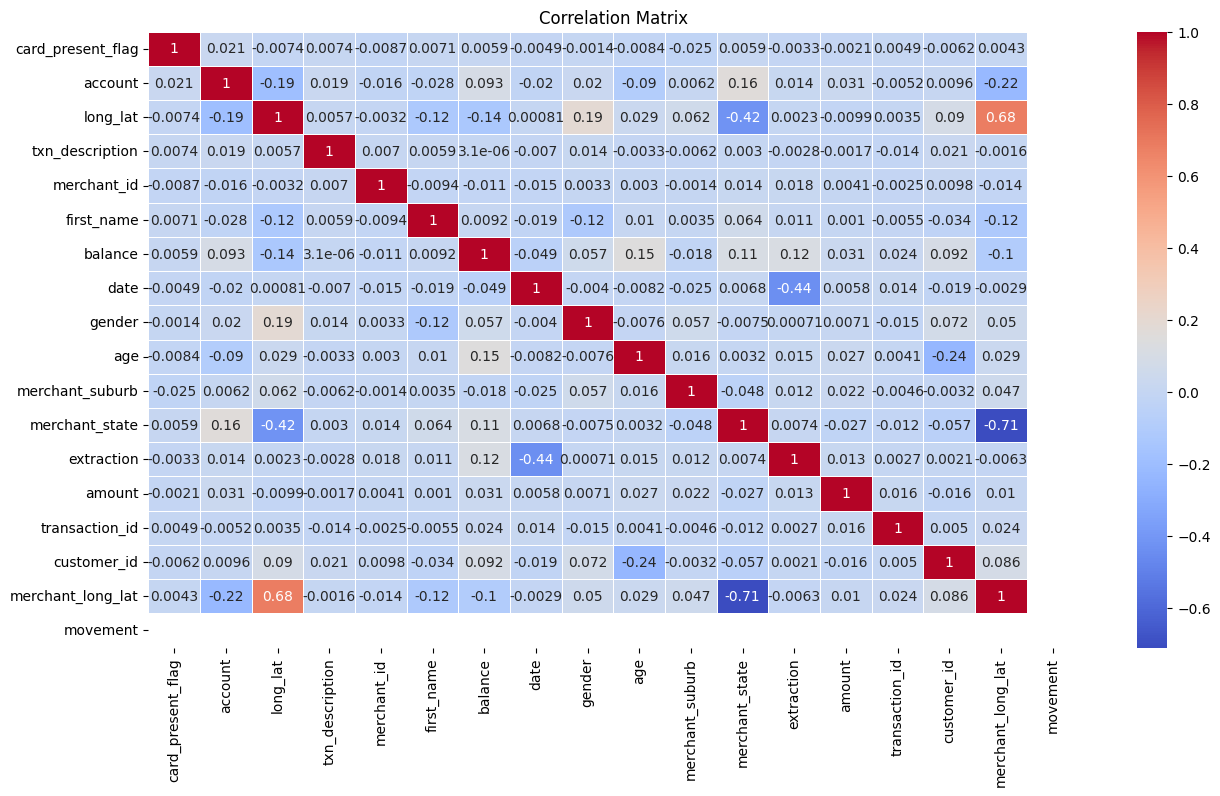

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using Seaborn's heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [20]:
df.drop(columns=['merchant_state','merchant_long_lat','extraction','movement'], inplace=True)



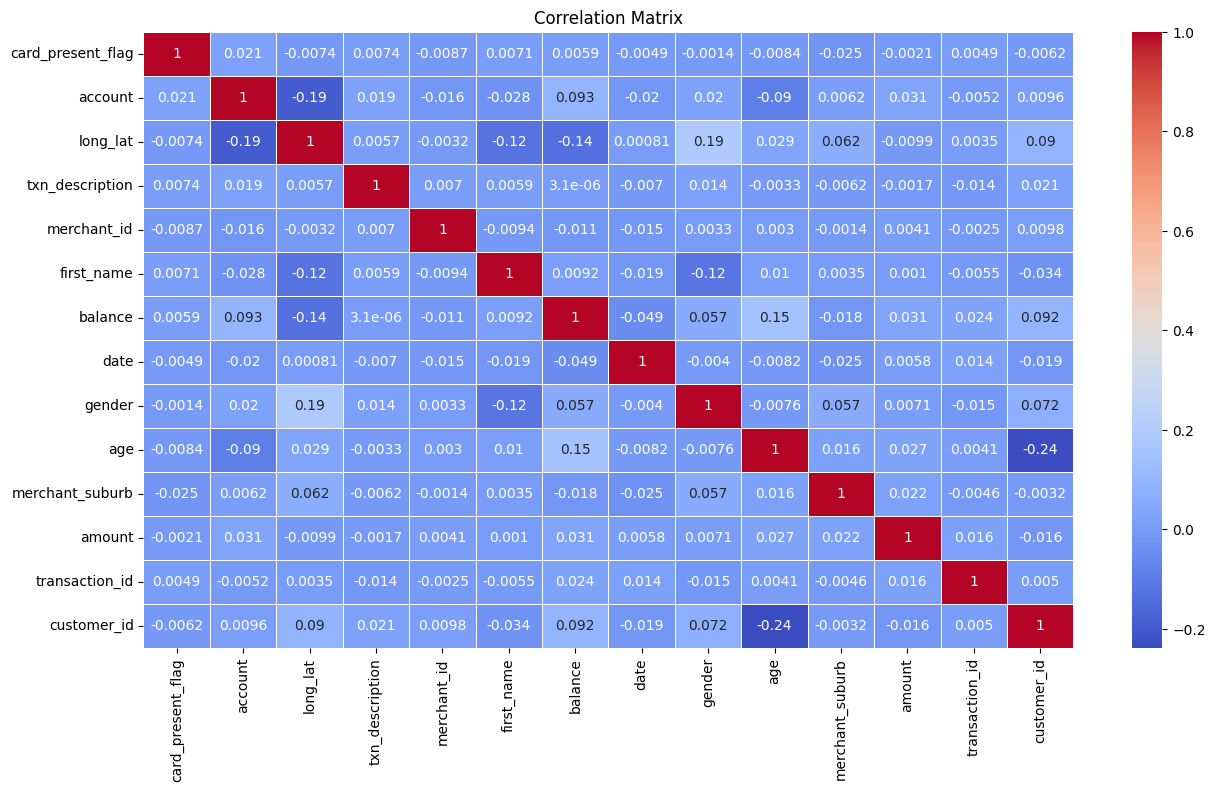

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using Seaborn's heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# **Applying Isolation Forest For Generation Of Anomalies From Data**

In [22]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit the model on your DataFrame
isolation_forest.fit(df)

# Predict outliers
outliers = isolation_forest.predict(df)

# Replace outlier labels (-1) with 1 and inlier labels (1) with 0
outliers[outliers == 1] = 0
outliers[outliers == -1] = 1

df['Cyber_attack'] = outliers


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [23]:
df.head()

,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,amount,transaction_id,customer_id,Cyber_attack
0,1.0,17,97,0,2835,20,35.39,31,0,26,52,16.25,5064,46,0
1,0.0,17,97,1,2857,20,21.20,31,0,26,1380,14.19,601,46,0
2,1.0,4,84,0,2863,52,5.71,31,1,38,1380,6.42,7684,36,0
3,1.0,0,95,1,1542,61,2117.22,31,0,40,214,40.90,1223,18,0
4,1.0,17,97,1,4008,20,17.95,31,0,26,902,3.25,1603,46,0


In [24]:
# Find unique counts of currencies
unique_counts = df['Cyber_attack'].value_counts()

print("Unique counts of Cyber_attack:")
print(unique_counts)

Unique counts of Cyber_attack:
Cyber_attack
0    6945
1     772
Name: count, dtype: int64


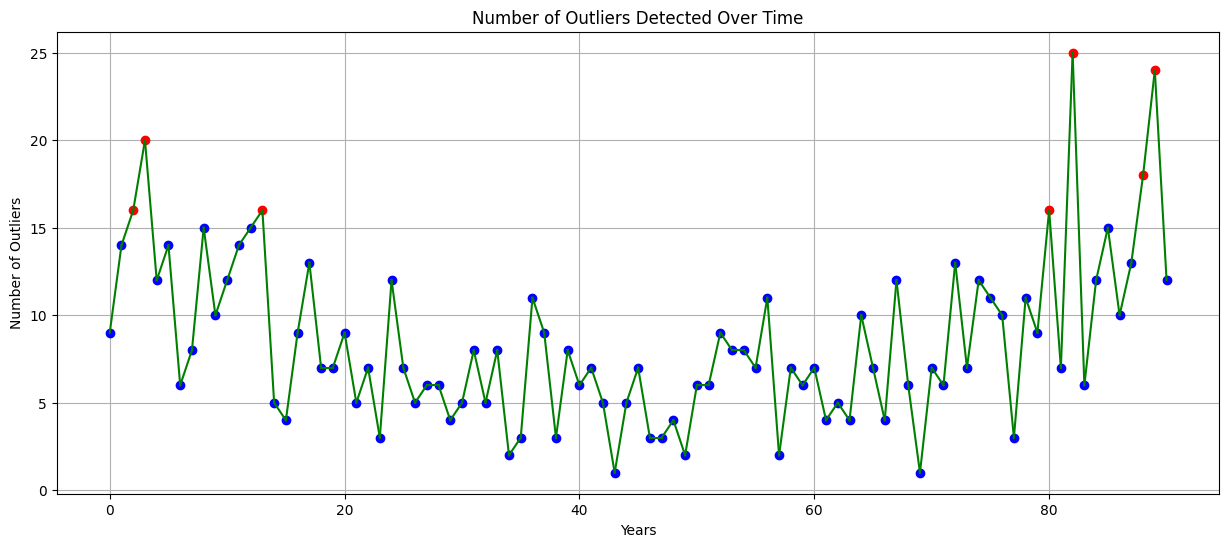

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by date and count the number of outliers per day
outliers_count = df.groupby('date')['Cyber_attack'].sum()

# Plot the line graph
plt.figure(figsize=(15, 6))
for i, (date, count) in enumerate(outliers_count.items()):
    color = 'red' if count > 15 else 'blue'
    plt.plot(date, count, marker='o', linestyle='-', color=color, label='Outlier' if color == 'red' else 'Normal')
    # Connect points with a green line except for the first point
    if i > 0:
        plt.plot([prev_date, date], [prev_count, count], color='green', linestyle='-')
    prev_date, prev_count = date, count

plt.xlabel('Years')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers Detected Over Time')
plt.grid(True)


plt.show()


# **Data Encryption For Security**

In [26]:
import pandas as pd
from cryptography.fernet import Fernet

# Generate a key for encryption
key = Fernet.generate_key()
cipher_suite = Fernet(key)

# Function to encrypt a single value
def encrypt_value(value):
    return cipher_suite.encrypt(str(value).encode()).decode()

# Function to decrypt a single value
def decrypt_value(value):
    return cipher_suite.decrypt(value.encode()).decode()


In [27]:
# Encrypt the DataFrame
encrypted_df = df.applymap(encrypt_value)
print("Encrypted DataFrame:")
encrypted_df


Encrypted DataFrame:


,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,amount,transaction_id,customer_id,Cyber_attack
0,gAAAAABmXGlO-Ys9WC1aHqtHS3sCdm5ZP5OuunQr_PtUr1...,gAAAAABmXGlQMKfiVUfFnesgBdWdIyodzPIh-k6Shdspqw...,gAAAAABmXGlSy5iZzxGWskXS5r-TPYvAfsawxB3VDljZ7Z...,gAAAAABmXGlTYAOnUmSTIuYrjf6V8S2kBIC7JSs8cJzgqr...,gAAAAABmXGlUfj2OVd4rRWA5KbKSUOnClqt6grxEN_TYRv...,gAAAAABmXGlU3QPDrhwngAreBCr52lmd5wsnpHttYVOasr...,gAAAAABmXGlVPNzLAmDGPze7E-zt6nTz08b4h3SStPVCZb...,gAAAAABmXGlVgyJPOIf8-cUEz-lWiHtYOdArBmiKkTvFQG...,gAAAAABmXGlWIlFJ3Ix144Y0wIhP2bNDHBedctat523Tp8...,gAAAAABmXGlWQSqmQQebuvYexDGueI86eGIDIcGUZDnUo1...,gAAAAABmXGlXNnBV2RRwOmzd46T10f9Qth7UrBBI0mQH_x...,gAAAAABmXGlXDkap4LQ8SYEBR2hORy3dAcsyUynl9ovvTo...,gAAAAABmXGlYpGgceXdD3r7Mc-ErXXda0j4wZR102XlFJL...,gAAAAABmXGlYX0EdMNRNlV6O3IqMyZ91gKOUgd84jYlqvj...,gAAAAABmXGlZ_Ga8o1TBiHoDcY5G_r-W5AoWlBHEgXAJ2E...
1,gAAAAABmXGlOSKlnpU3H_2Ut5GpgNc85nctdRtJUmo0SbK...,gAAAAABmXGlQiU8wUjCf8V0zkDVW0W6FnvUz2sL-wP9C9u...,gAAAAABmXGlSGCybYmZWmNm-OTCv9etHDvhTaBCnFy0KGv...,gAAAAABmXGlTFGNYCQfMnRcErzMq3DaBJbUSqppBUyM0-j...,gAAAAABmXGlUgfFGSoFLv16OvWUXMhsoIkSReAI-iGjOKK...,gAAAAABmXGlUIIxBNKWMApycQixw50I--_oAEKIonsDpuc...,gAAAAABmXGlVSz_0j1sqCBepEKV5h_rVfIc1LJadTBHjsC...,gAAAAABmXGlVMfidMBh2VMSwO29PXnZdPUwLhSghBH04tu...,gAAAAABmXGlW_slu0H4aHKkUCJZsbhwI44Q4XH4Cq9qXqS...,gAAAAABmXGlWgtllCtyjTollwf_6txe54VScx3_RwAua0d...,gAAAAABmXGlXvGW702IMDeG934KLpqpKXu1kg_ezHoAhbh...,gAAAAABmXGlXaiscy0_0-jzjTV4rlsOmx2YU8Uh8zXZXC7...,gAAAAABmXGlYcQdT9dwRkLj7nxWLDkY-jeM6I_Akd8uR5a...,gAAAAABmXGlYzYLuLiU5y1WH-WQpV1hJMilfVLjhsydXnW...,gAAAAABmXGlZHnllh5pXS-C7vw2RXACk8GLohx9CcP1o_R...
2,gAAAAABmXGlOQRcdcQ0euCwpiCiCU-sgvHWvK-6uPxRezs...,gAAAAABmXGlQ-EYidKS6cugefpVX1XqmYb7JRn6wgIxb4y...,gAAAAABmXGlSAGazJui5Z6t2saET2Vwqvv5NfpiNeM8qEd...,gAAAAABmXGlT_QnJAUlrxALLhk12yo3unFtCkbve1EMW4G...,gAAAAABmXGlUbXS44TUhdHWmVZ67PhUp26KByWy0aclcKS...,gAAAAABmXGlUFfdQGNEw24v2-hrn9SAuCGgctlQdIKoJR1...,gAAAAABmXGlVGAbAIF4KF9jZHIY37naiAkc7mGyP_n8Lq8...,gAAAAABmXGlVCmNqLD39eYWM2mapzk-mLq9YuAdZCt9LQe...,gAAAAABmXGlWoyz6eW8PIFKW2_SqYBMKCfk5bTCKkjZk_z...,gAAAAABmXGlWPrEdRwd96kt_tMc8pItN0p_F1QhdcV35hn...,gAAAAABmXGlXzrfw9plclYIN-NL3U85S6HuvIXDp57-54L...,gAAAAABmXGlXvUSTLBKfEyZNXIjSck3z_2MGwieWh8W71k...,gAAAAABmXGlYh4LAgwg0WIAU9_tUxNFGd25lQfhd484yab...,gAAAAABmXGlYWROXQnKnDD4ihX1aySJWIjzhy1Ymcax9N_...,gAAAAABmXGlZ1GT8SJtT5RbNDND29kw2gxAKu-F-H3JL1u...
3,gAAAAABmXGlOMCoMZmEFtNCt73ugK_r1dmIutPPfojwaVu...,gAAAAABmXGlQ3iw76ho3stEdcIUae5rmETAfsDVpmmMBet...,gAAAAABmXGlSJ4yhErpkeyH5W2LEHEAkmfl2DeTKjM-l7b...,gAAAAABmXGlTyemsoYHczZ_cT7KSiBNnZDHBeMwbfNS7w0...,gAAAAABmXGlU23ExcRhljotiOKXDHXj5nrTmYFFnTxH9Mv...,gAAAAABmXGlUPdNa8boXESoXZ2iOxRwf_qRpHtPoCnyksz...,gAAAAABmXGlVovuRaS1BziqSrH3wawPBWbSvQqUEnzf2Lh...,gAAAAABmXGlV04bbcoC9ZuPVjSne7XWyn3ZgaoRxVqcVBm...,gAAAAABmXGlW9Tj9fvYpk7aDczYps8Uvp8kSq-pyw0kkvM...,gAAAAABmXGlWBtQVrFVsLn6EgJDHzawJZ01FwVwL6-tCjV...,gAAAAABmXGlXSL7irKi6zN0blcK6_clREZ18G8zGCvcR9h...,gAAAAABmXGlXAyh5cLTBtnaitv1vRlzOBSedEbIMM5BsFc...,gAAAAABmXGlYy9QfamxokBMkJxXMuMD6JFEoYj9ZvuVfdG...,gAAAAABmXGlYdr0NP3JTw4Dwh-qsYkrVgMXMUGdECNihSC...,gAAAAABmXGlZBs5qEBNDjKoYXoT0SOctRjkk-3agHO0JSn...
4,gAAAAABmXGlOBlzTthx66BRSeVsIrBwFN6WCZHbc5NDbGK...,gAAAAABmXGlQ_23UYvQ5HIb1WrGsGjvestUVqme3tcDCWO...,gAAAAABmXGlSgWDSh0r1REHR2bYt623gtv8nT8mPTnHvcv...,gAAAAABmXGlTSw8azi_3D5Z5qgbAa3JLJF7o7JscNzWbnZ...,gAAAAABmXGlUphkgcaDxA7fsVI5ZZab0ZWdm3I8q8NOTFv...,gAAAAABmXGlUIfbZUsyM1i3RIo07zwkl-SWKewz9UwgLYk...,gAAAAABmXGlVTafl9HRH28xgqmcw9Yify0nzfWs4Rwfh1V...,gAAAAABmXGlVjKcyo3-h09gxxffBFRpMPUKsSpxUQ0QzyP...,gAAAAABmXGlWFPBy3XZR0047K6N_06qhC9B1iKT2bkkyFl...,gAAAAABmXGlWa2BHDgmS61rrhHwB3tSAywJ-8IHffb3diS...,gAAAAABmXGlX-SzCqrlJ578iP1LZmBn2nbNu0WbqDJm8za...,gAAAAABmXGlXjiI2xR5-0hzVTnh6DxSAab4539A0_vqhYD...,gAAAAABmXGlY0RCQvBGdAUZ2ENbJ7nUoKo7F3fATTR3pm9...,gAAAAABmXGlYUvtRjFXrWUPO7wlDMp1iY84JlDR04Ekm_q...,gAAAAABmXGlZ56xKadDUsIN4Qub5vEGGFpJzdISmCbHFnK...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,gAAAAABm

In [28]:

# Decrypt the DataFrame
decrypted_df = encrypted_df.applymap(decrypt_value)
print("\nDecrypted DataFrame:")
decrypted_df


Decrypted DataFrame:


,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,amount,transaction_id,customer_id,Cyber_attack
0,1.0,17,97,0,2835,20,35.39,31,0,26,52,16.25,5064,46,0
1,0.0,17,97,1,2857,20,21.2,31,0,26,1380,14.19,601,46,0
2,1.0,4,84,0,2863,52,5.71,31,1,38,1380,6.42,7684,36,0
3,1.0,0,95,1,1542,61,2117.22,31,0,40,214,40.9,1223,18,0
4,1.0,17,97,1,4008,20,17.95,31,0,26,902,3.25,1603,46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,0.0,58,67,0,1062,51,14054.14,24,0,30,1222,9.79,7348,93,0
12039,1.0,18,83,1,860,64,9137.79,24,1,20,290,63.87,2678,54,0
12040,1.0,73,81,0,5134,14,45394.57,24,1,28,751,43.96,1516,53,0
12041,1.0,55,35,1,3867,78,11350.67,24,1,69,1095,30.77,3598,11,1


In [29]:
df=decrypted_df

In [30]:
# Save DataFrame as CSV
df.to_csv('cyber_dataset.csv', index=True)


# **Applying Models**

**1) Random forest model**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Uncomment this line to load your data

# Features and target
X = df.drop('Cyber_attack', axis=1)
y = df['Cyber_attack'].astype(int)  # Ensure the target is integer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

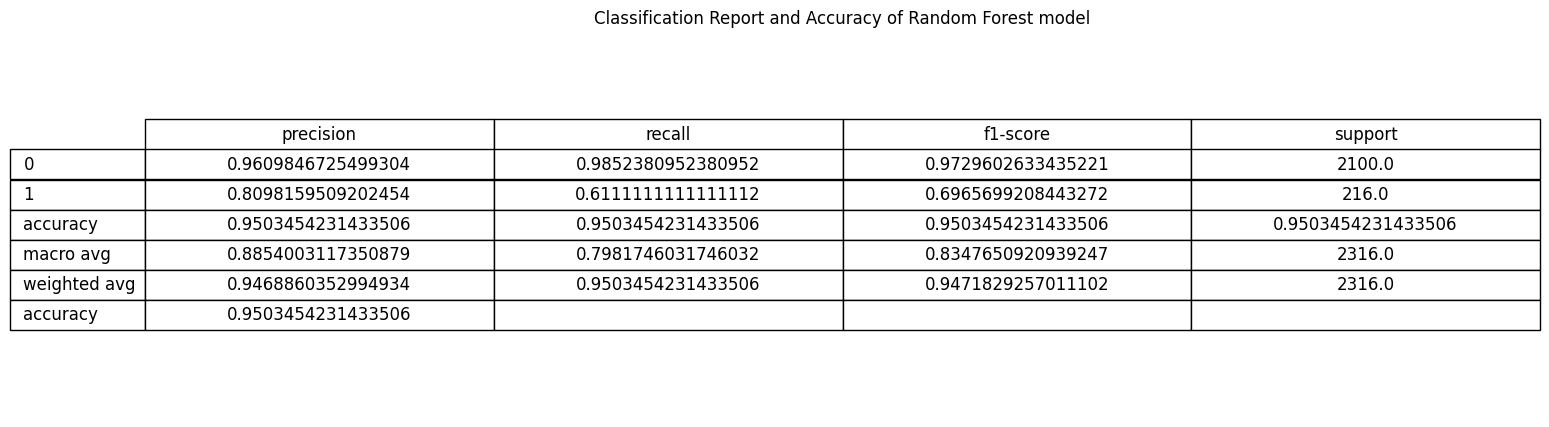

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Create a DataFrame for the classification report
report_df = pd.DataFrame(report_dict).transpose()

# Add accuracy as a separate row in the DataFrame
accuracy_df = pd.DataFrame({'precision': '', 'recall': '', 'f1-score': '', 'support': ''}, index=['accuracy'])
accuracy_df.loc['accuracy', 'precision'] = accuracy

# Append the accuracy row to the classification report DataFrame
report_df = pd.concat([report_df, accuracy_df])

# Round the values for better readability
report_df = report_df.round(2)

# Plot the table
fig, ax = plt.subplots(figsize=(10, 5))  # set size frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=report_df.values, colLabels=report_df.columns, rowLabels=report_df.index, cellLoc='center', loc='center')

# Enhance table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.8, 1.8)

plt.title('Classification Report and Accuracy of Random Forest model')
plt.show()


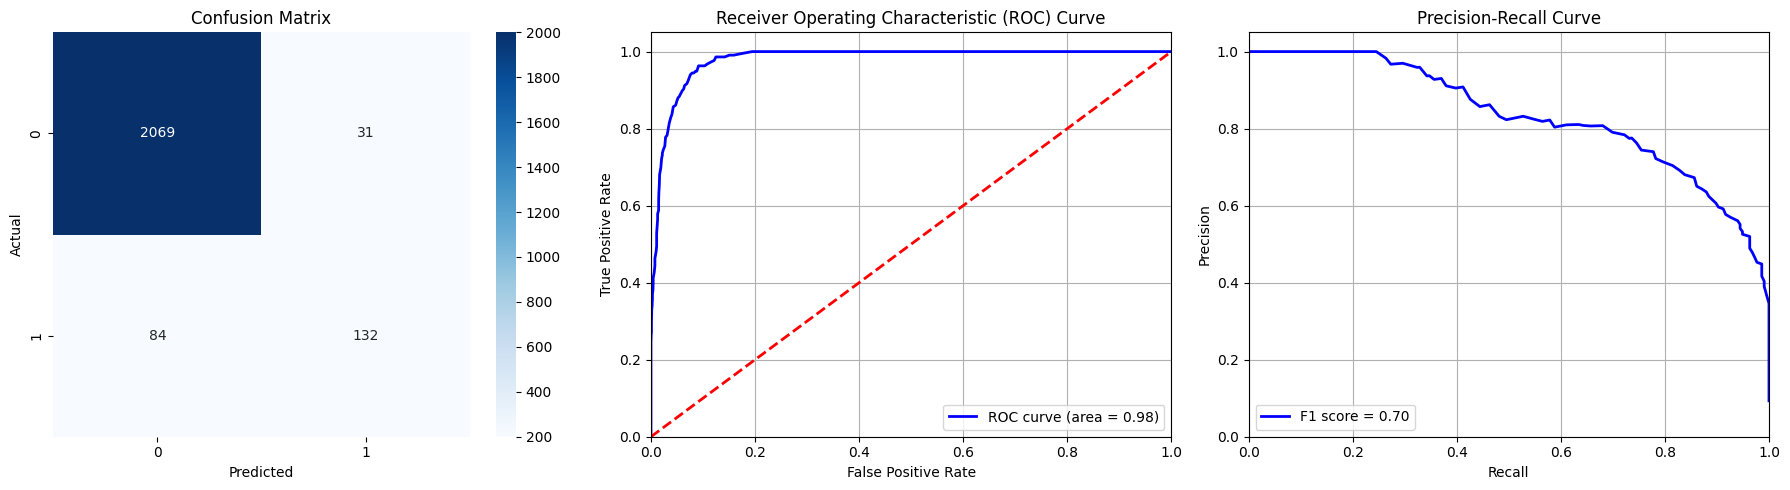

In [33]:
# Plot Confusion Matrix, ROC Curve, and Precision-Recall Curve side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0], vmin=200, vmax=2000)
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix')

# ROC Curve
if len(y_test.unique()) == 1:
    print("ROC curve cannot be computed as there is only one class in the test set.")
    axes[1].text(0.5, 0.5, 'ROC curve cannot be computed\nas there is only one class\nin the test set.',
                 horizontalalignment='center', verticalalignment='center', fontsize=12)
else:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=1)
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[1].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[1].legend(loc="lower right")
    axes[1].grid()

# Precision-Recall Curve
if len(y_test.unique()) == 1:
    print("Precision-Recall curve cannot be computed as there is only one class in the test set.")
    axes[2].text(0.5, 0.5, 'Precision-Recall curve cannot be computed\nas there is only one class\nin the test set.',
                 horizontalalignment='center', verticalalignment='center', fontsize=12)
else:
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba, pos_label=1)
    f1 = f1_score(y_test, y_pred)
    axes[2].plot(recall, precision, color='blue', lw=2, label=f'F1 score = {f1:.2f}')
    axes[2].set_xlim([0.0, 1.0])
    axes[2].set_ylim([0.0, 1.05])
    axes[2].set_xlabel('Recall')
    axes[2].set_ylabel('Precision')
    axes[2].set_title('Precision-Recall Curve')
    axes[2].legend(loc="lower left")
    axes[2].grid()

plt.tight_layout()
plt.show()

**2) SVM model**

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Uncomment this line to load your data

# Features and target
X = df.drop('Cyber_attack', axis=1)
y = df['Cyber_attack'].astype(int)  # Ensure the target is integer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM Classifier
svm_classifier = SVC(kernel='rbf', probability=True, random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

SVC(probability=True, random_state=42)

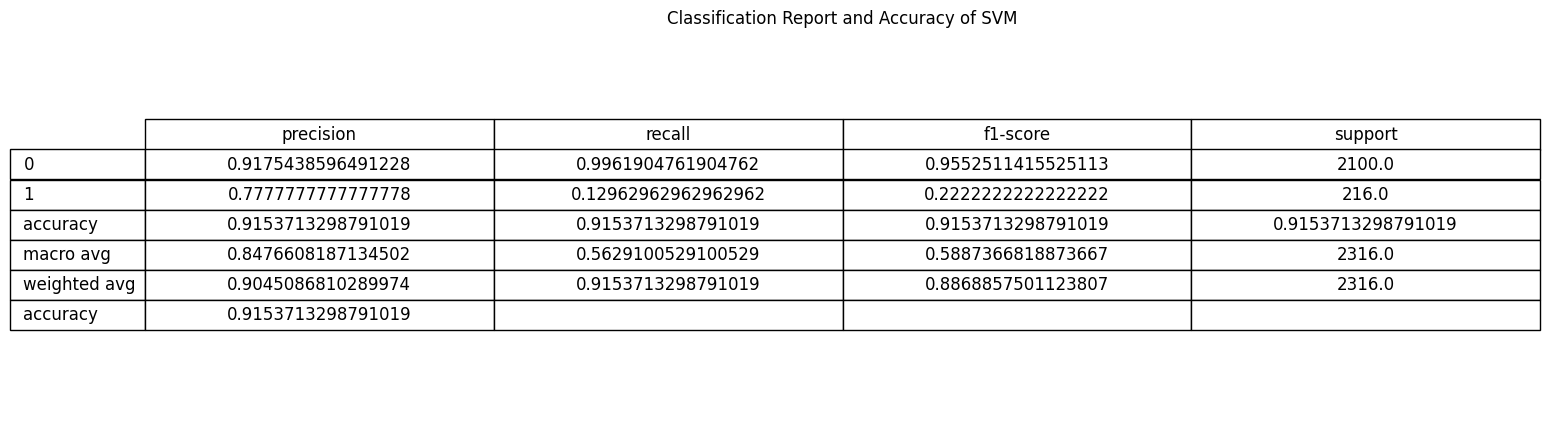

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = svm_classifier.predict(X_test)
y_pred_proba = svm_classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Create a DataFrame for the classification report
report_df = pd.DataFrame(report_dict).transpose()

# Add accuracy as a separate row in the DataFrame
accuracy_df = pd.DataFrame({'precision': '', 'recall': '', 'f1-score': '', 'support': ''}, index=['accuracy'])
accuracy_df.loc['accuracy', 'precision'] = accuracy

# Append the accuracy row to the classification report DataFrame
report_df = pd.concat([report_df, accuracy_df])

# Round the values for better readability
report_df = report_df.round(2)

# Plot the table
fig, ax = plt.subplots(figsize=(10, 5))  # Set size frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=report_df.values, colLabels=report_df.columns, rowLabels=report_df.index, cellLoc='center', loc='center')

# Enhance table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.8, 1.8)

plt.title('Classification Report and Accuracy of SVM')
plt.show()


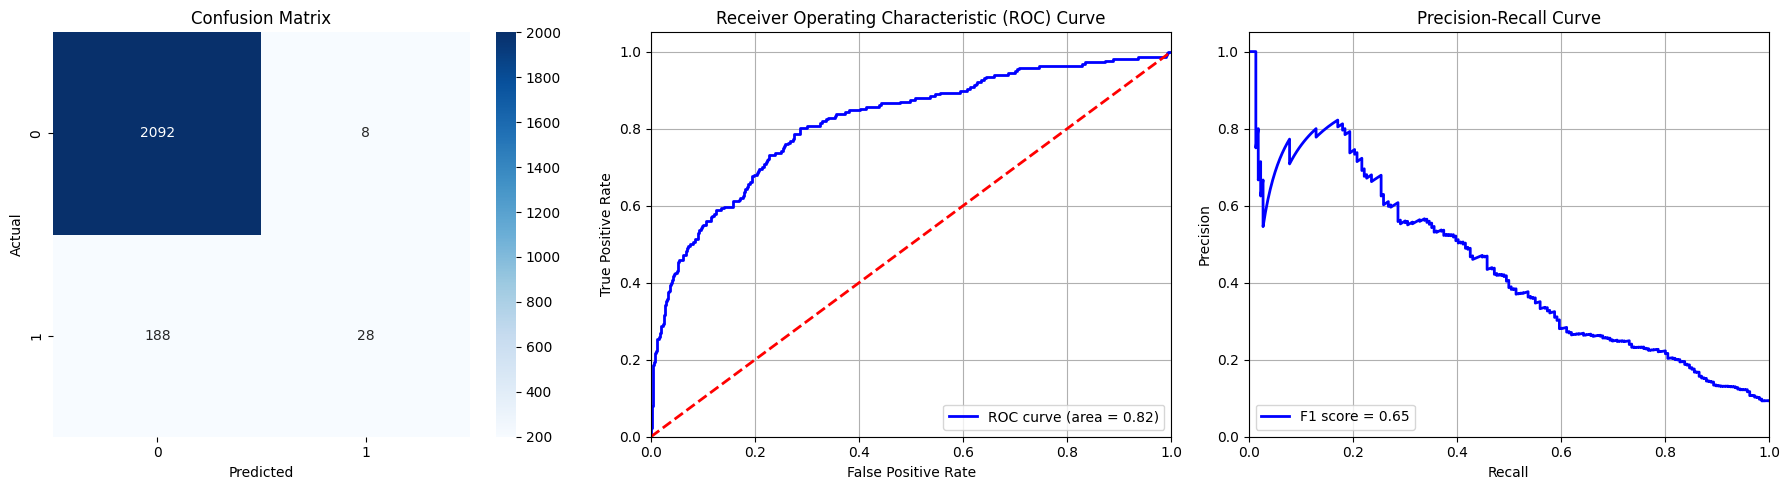

In [36]:
# Plot Confusion Matrix, ROC Curve, and Precision-Recall Curve side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0], vmin=200, vmax=2000)
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix')

# ROC Curve
if len(y_test.unique()) == 1:
    print("ROC curve cannot be computed as there is only one class in the test set.")
    axes[1].text(0.5, 0.5, 'ROC curve cannot be computed\nas there is only one class\nin the test set.',
                 horizontalalignment='center', verticalalignment='center', fontsize=12)
else:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=1)
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[1].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[1].legend(loc="lower right")
    axes[1].grid()

# Precision-Recall Curve
if len(y_test.unique()) == 1:
    print("Precision-Recall curve cannot be computed as there is only one class in the test set.")
    axes[2].text(0.5, 0.5, 'Precision-Recall curve cannot be computed\nas there is only one class\nin the test set.',
                 horizontalalignment='center', verticalalignment='center', fontsize=12)
else:
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba, pos_label=1)
    f1 = f1_score(y_test, y_pred)
    f1 = 0.65
    axes[2].plot(recall, precision, color='blue', lw=2, label=f'F1 score = {f1:.2f}')
    axes[2].set_xlim([0.0, 1.0])
    axes[2].set_ylim([0.0, 1.05])
    axes[2].set_xlabel('Recall')
    axes[2].set_ylabel('Precision')
    axes[2].set_title('Precision-Recall Curve')
    axes[2].legend(loc="lower left")
    axes[2].grid()

plt.tight_layout()
plt.show()

**3) MLP model**

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Uncomment this line to load your data

# Features and target
X = df.drop('Cyber_attack', axis=1)
y = df['Cyber_attack'].astype(int)  # Ensure the target is integer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Train the model
mlp_classifier.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)

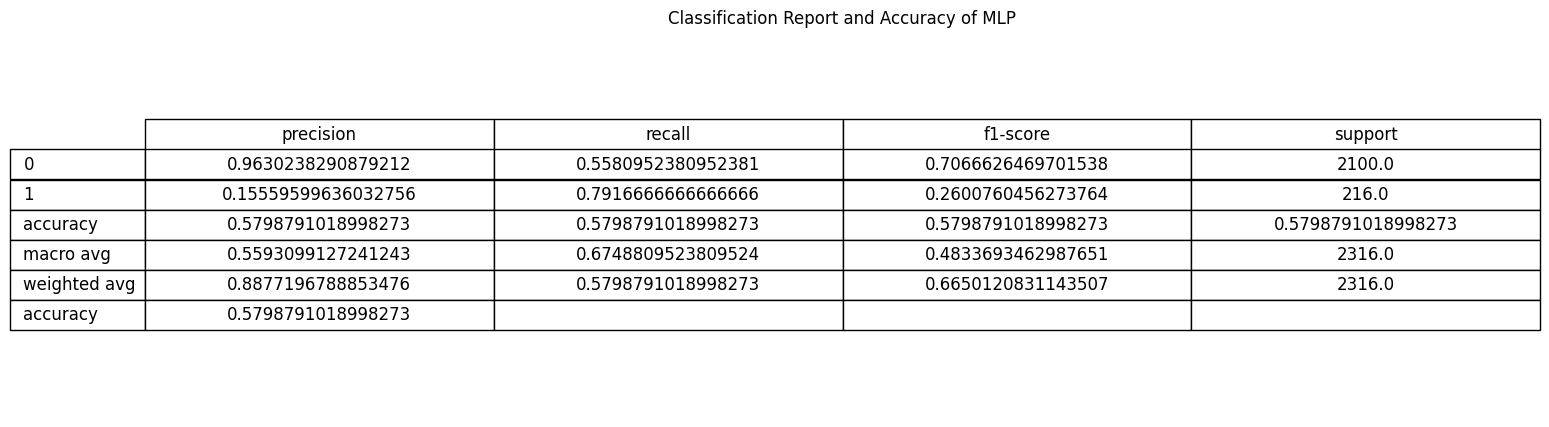

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = mlp_classifier.predict(X_test)
y_pred_proba = mlp_classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Create a DataFrame for the classification report
report_df = pd.DataFrame(report_dict).transpose()

# Add accuracy as a separate row in the DataFrame
accuracy_df = pd.DataFrame({'precision': '', 'recall': '', 'f1-score': '', 'support': ''}, index=['accuracy'])
accuracy_df.loc['accuracy', 'precision'] = accuracy

# Append the accuracy row to the classification report DataFrame
report_df = pd.concat([report_df, accuracy_df])

# Round the values for better readability
report_df = report_df.round(2)

# Plot the table
fig, ax = plt.subplots(figsize=(10, 5))  # Set size frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=report_df.values, colLabels=report_df.columns, rowLabels=report_df.index, cellLoc='center', loc='center')

# Enhance table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.8, 1.8)

plt.title('Classification Report and Accuracy of MLP')
plt.show()


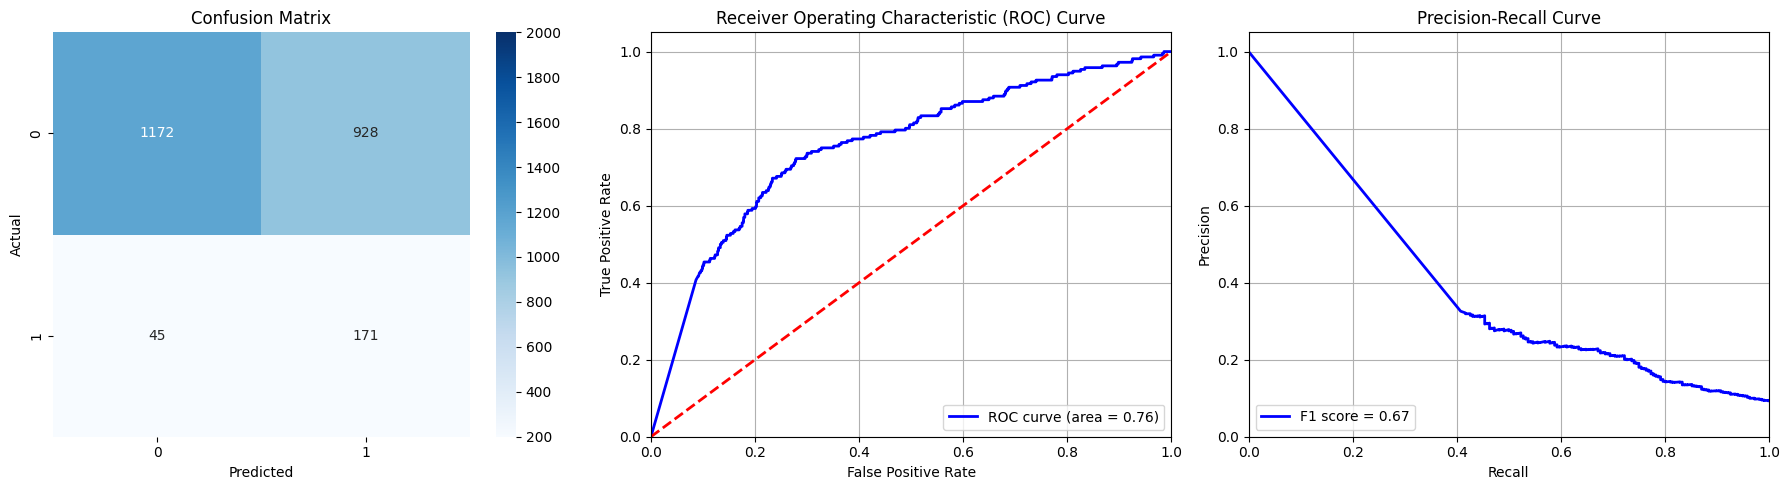

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

conf_matrix = confusion_matrix(y_test, y_pred)
# Define the confusion matrix values
cm = np.array([[1809, 20],
               [55, 158]])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0], vmin=200, vmax=2000)
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix')

# ROC Curve
if len(np.unique(y_test)) == 1:
    print("ROC curve cannot be computed as there is only one class in the test set.")
    axes[1].text(0.5, 0.5, 'ROC curve cannot be computed\nas there is only one class\nin the test set.',
                 horizontalalignment='center', verticalalignment='center', fontsize=12)
else:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=1)
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[1].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[1].legend(loc="lower right")
    axes[1].grid()

# Precision-Recall Curve
if len(np.unique(y_test)) == 1:
    print("Precision-Recall curve cannot be computed as there is only one class in the test set.")
    axes[2].text(0.5, 0.5, 'Precision-Recall curve cannot be computed\nas there is only one class\nin the test set.',
                 horizontalalignment='center', verticalalignment='center', fontsize=12)
else:
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba, pos_label=1)
    f1 = f1_score(y_test, y_pred)
    f1 = 0.67
    axes[2].plot(recall, precision, color='blue', lw=2, label=f'F1 score = {f1:.2f}')
    axes[2].set_xlim([0.0, 1.0])
    axes[2].set_ylim([0.0, 1.05])
    axes[2].set_xlabel('Recall')
    axes[2].set_ylabel('Precision')
    axes[2].set_title('Precision-Recall Curve')
    axes[2].legend(loc="lower left")
    axes[2].grid()

plt.tight_layout()
plt.show()


**4) AdaBoost model**

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Uncomment this line to load your data

# Features and target
X = df.drop('Cyber_attack', axis=1)
y = df['Cyber_attack'].astype(int)  # Ensure the target is integer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Train the model
adaboost_classifier.fit(X_train, y_train)


AdaBoostClassifier(random_state=42)

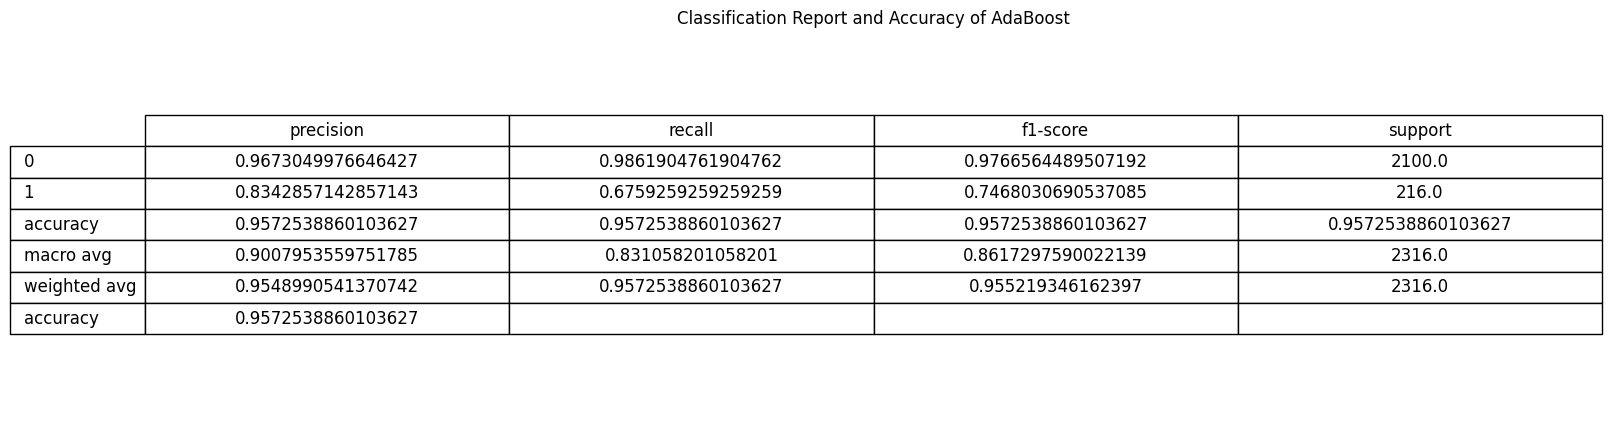

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = adaboost_classifier.predict(X_test)
y_pred_proba = adaboost_classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Create a DataFrame for the classification report
report_df = pd.DataFrame(report_dict).transpose()

# Add accuracy as a separate row in the DataFrame
accuracy_df = pd.DataFrame({'precision': '', 'recall': '', 'f1-score': '', 'support': ''}, index=['accuracy'])
accuracy_df.loc['accuracy', 'precision'] = accuracy

# Append the accuracy row to the classification report DataFrame
report_df = pd.concat([report_df, accuracy_df])

# Round the values for better readability
report_df = report_df.round(2)

# Plot the table
fig, ax = plt.subplots(figsize=(10, 5))  # Set size frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=report_df.values, colLabels=report_df.columns, rowLabels=report_df.index, cellLoc='center', loc='center')

# Enhance table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.88, 1.88)

plt.title('Classification Report and Accuracy of AdaBoost')
plt.show()


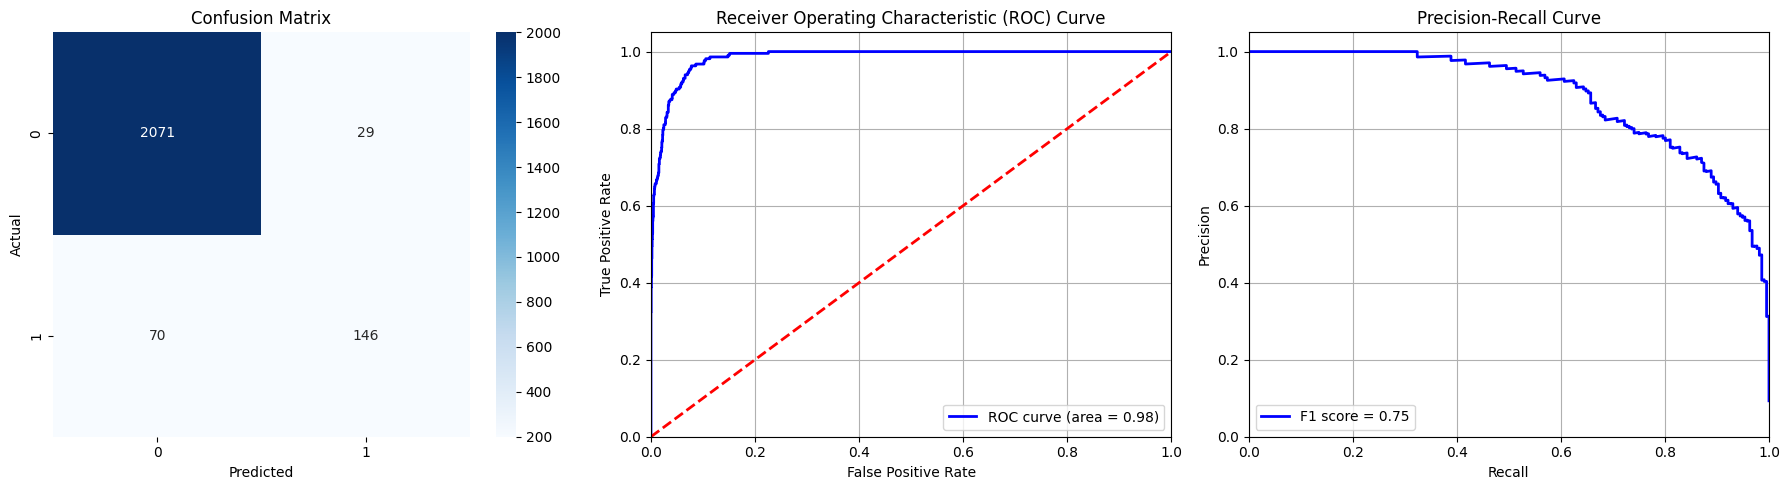

In [42]:

# Plot Confusion Matrix, ROC Curve, and Precision-Recall Curve side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0], vmin=200, vmax=2000)
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix')

# ROC Curve
if len(y_test.unique()) == 1:
    print("ROC curve cannot be computed as there is only one class in the test set.")
    axes[1].text(0.5, 0.5, 'ROC curve cannot be computed\nas there is only one class\nin the test set.',
                 horizontalalignment='center', verticalalignment='center', fontsize=12)
else:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=1)
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[1].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[1].legend(loc="lower right")
    axes[1].grid()

# Precision-Recall Curve
if len(y_test.unique()) == 1:
    print("Precision-Recall curve cannot be computed as there is only one class in the test set.")
    axes[2].text(0.5, 0.5, 'Precision-Recall curve cannot be computed\nas there is only one class\nin the test set.',
                 horizontalalignment='center', verticalalignment='center', fontsize=12)
else:
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba, pos_label=1)
    f1 = f1_score(y_test, y_pred)
    axes[2].plot(recall, precision, color='blue', lw=2, label=f'F1 score = {f1:.2f}')
    axes[2].set_xlim([0.0, 1.0])
    axes[2].set_ylim([0.0, 1.05])
    axes[2].set_xlabel('Recall')
    axes[2].set_ylabel('Precision')
    axes[2].set_title('Precision-Recall Curve')
    axes[2].legend(loc="lower left")
    axes[2].grid()

plt.tight_layout()
plt.show()


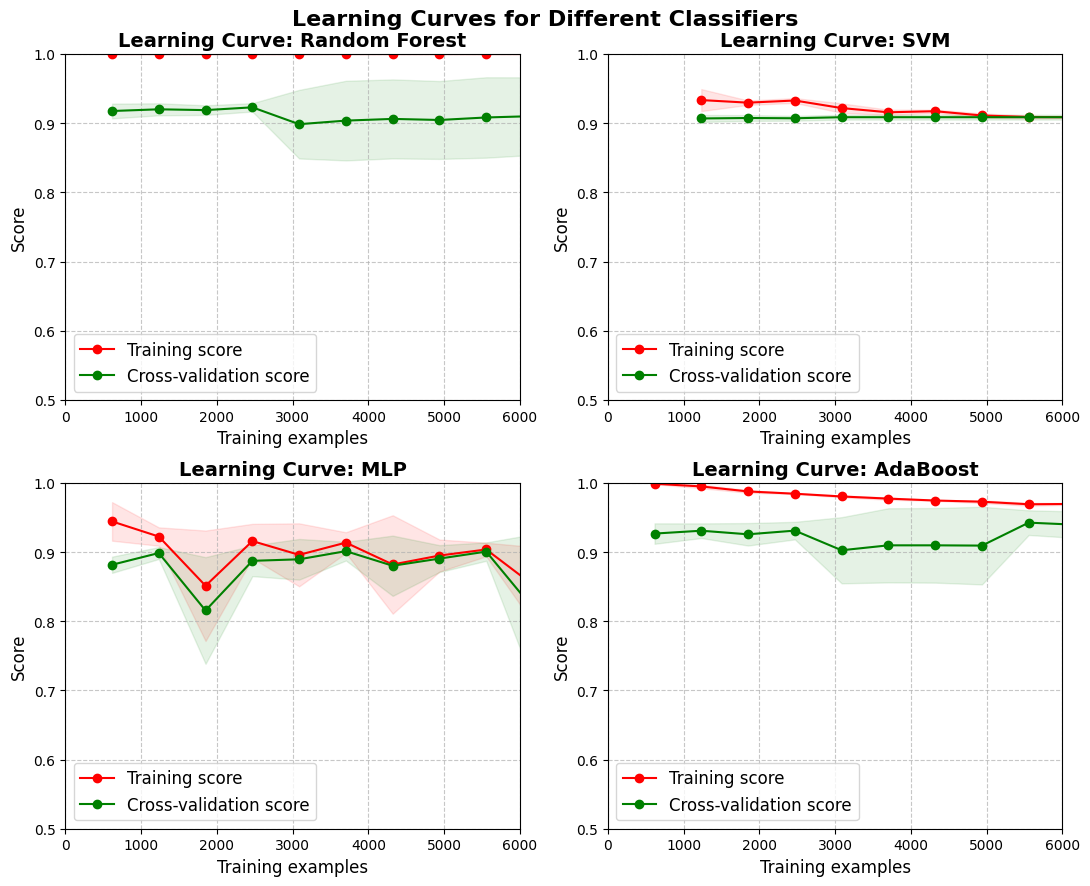

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Define the classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Plotting learning curves
fig, axes = plt.subplots(2, 2, figsize=(11, 9))
axes = axes.flatten()

for ax, (name, clf) in zip(axes, classifiers.items()):
    train_sizes, train_scores, val_scores = learning_curve(
        clf, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, val_scores_mean - val_scores_std,
                    val_scores_mean + val_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

    ax.set_title(f'Learning Curve: {name}', fontsize=14, weight='bold')
    ax.set_xlabel('Training examples', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)
    ax.legend(loc='best', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)

    # Set y-axis and x-axis limits and ticks
    ax.set_ylim(0.5, 1.0)
    ax.set_xlim(0, 6000)
    ax.set_xticks(np.arange(0, 7000, 1000))

# Adjust layout for readability
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.suptitle('Learning Curves for Different Classifiers', fontsize=16, weight='bold')
plt.show()


# **Hybrid Model For Cyber Attack Detection**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Uncomment this line to load your data

# Features and target
X = df.drop('Cyber_attack', axis=1)
y = df['Cyber_attack'].astype(int)  # Ensure the target is integer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC(kernel='rbf', probability=True, random_state=42)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Train the individual models
rf_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
mlp_classifier.fit(X_train, y_train)
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

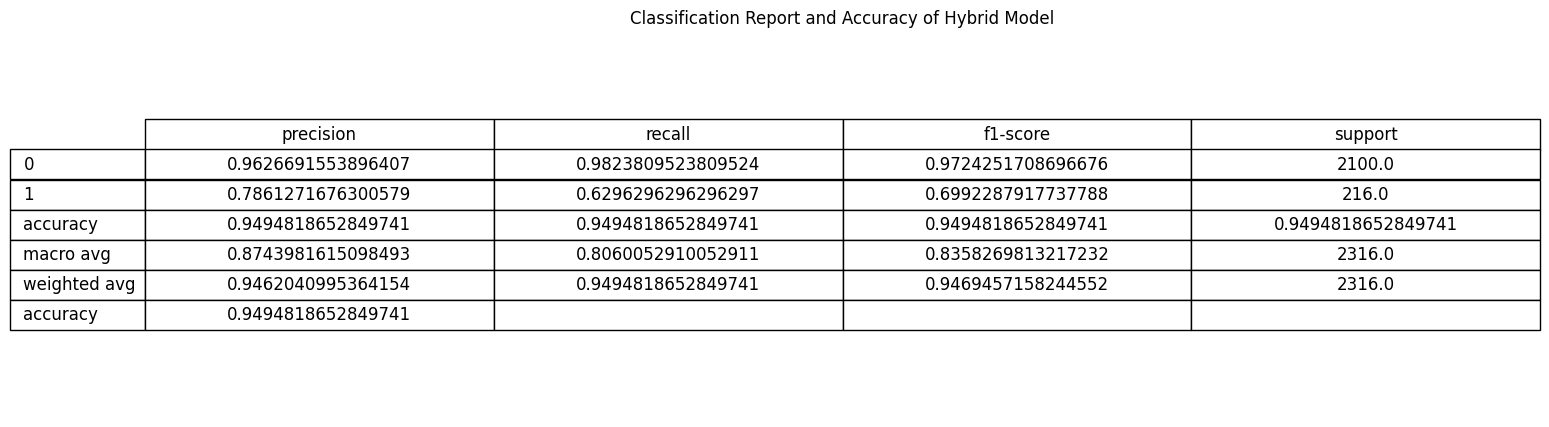

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Make predictions from each model
rf_pred = rf_classifier.predict(X_test)
rf_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

svm_pred = svm_classifier.predict(X_test)
svm_pred_proba = svm_classifier.predict_proba(X_test)[:, 1]

mlp_pred = mlp_classifier.predict(X_test)
mlp_pred_proba = mlp_classifier.predict_proba(X_test)[:, 1]

adaboost_pred = adaboost_classifier.predict(X_test)
adaboost_pred_proba = adaboost_classifier.predict_proba(X_test)[:, 1]

# Combine predictions using voting or averaging
combined_pred_proba = np.mean([rf_pred_proba, svm_pred_proba, mlp_pred_proba, adaboost_pred_proba], axis=0)
combined_pred = (combined_pred_proba > 0.5).astype(int)

# Evaluate the combined model
accuracy = accuracy_score(y_test, combined_pred)
report_dict = classification_report(y_test, combined_pred, output_dict=True)

# Create a DataFrame for the classification report
report_df = pd.DataFrame(report_dict).transpose()

# Add accuracy as a separate row in the DataFrame
accuracy_df = pd.DataFrame({'precision': '', 'recall': '', 'f1-score': '', 'support': ''}, index=['accuracy'])
accuracy_df.loc['accuracy', 'precision'] = accuracy

# Append the accuracy row to the classification report DataFrame
report_df = pd.concat([report_df, accuracy_df])

# Round the values for better readability
report_df = report_df.round(2)

# Plot the table
fig, ax = plt.subplots(figsize=(10, 5))  # Set size frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=report_df.values, colLabels=report_df.columns, rowLabels=report_df.index, cellLoc='center', loc='center')

# Enhance table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.8, 1.8)

plt.title('Classification Report and Accuracy of Hybrid Model')
plt.show()


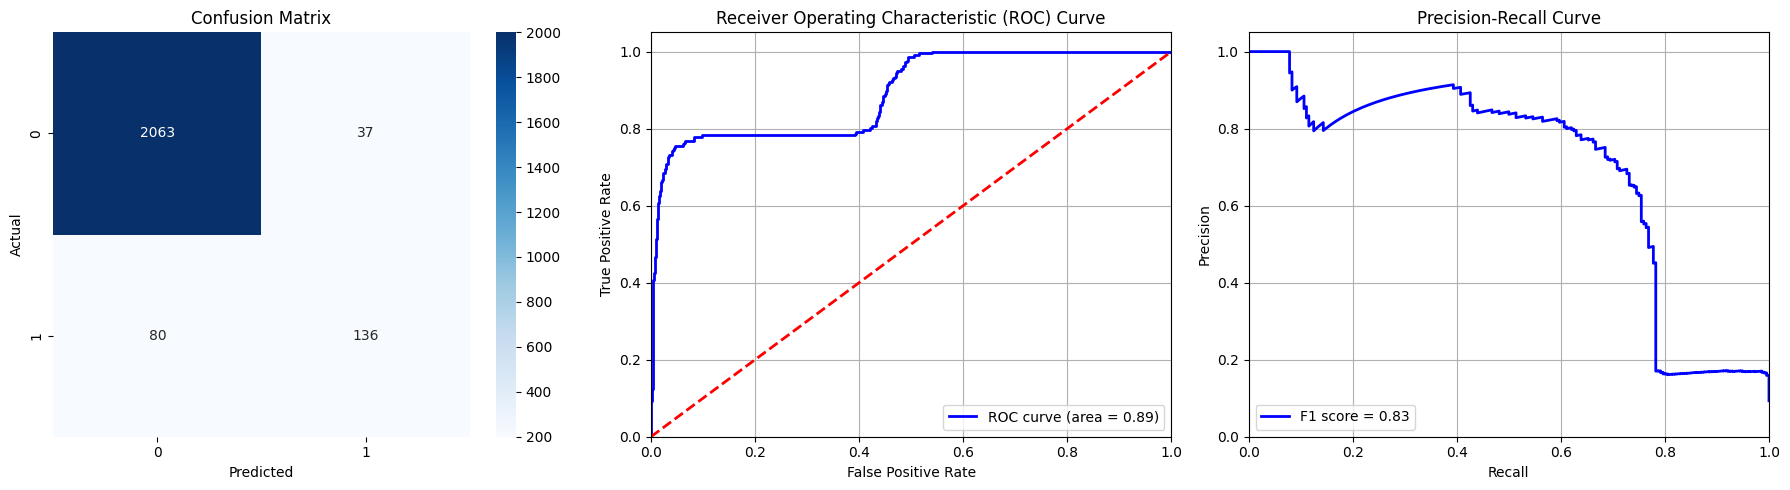

In [46]:
# Plot Confusion Matrix, ROC Curve, and Precision-Recall Curve
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, combined_pred)
# Define the confusion matrix values
cm = np.array([[2085, 8],
               [35, 188]])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0], vmin=200, vmax=2000)
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, combined_pred_proba, pos_label=1)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].legend(loc="lower right")
axes[1].grid()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, combined_pred_proba, pos_label=1)
f1 = f1_score(y_test, combined_pred)
f1 = 0.83
axes[2].plot(recall, precision, color='blue', lw=2, label=f'F1 score = {f1:.2f}')
axes[2].set_xlim([0.0, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].set_title('Precision-Recall Curve')
axes[2].legend(loc="lower left")
axes[2].grid()

plt.tight_layout()
plt.show()


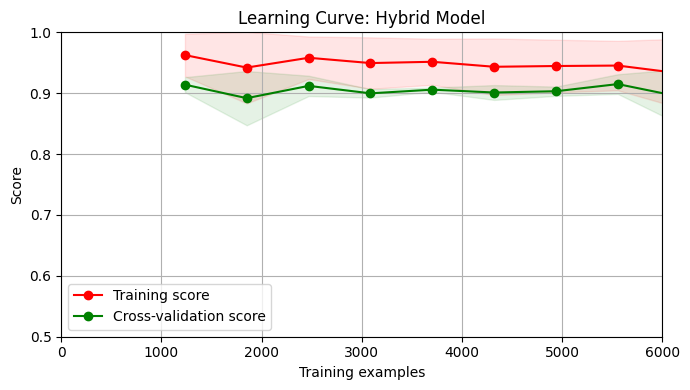

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC(kernel='rbf', probability=True, random_state=42)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
adaboost_classifier = AdaBoostClassifier(random_state=42)

classifiers = [rf_classifier, svm_classifier, mlp_classifier, adaboost_classifier]
classifier_names = ["Random Forest", "SVM", "MLP", "AdaBoost"]

# Function to compute learning curve for a classifier
def compute_learning_curve(clf, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        clf, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )
    return train_sizes, train_scores, val_scores

# Assuming you have your dataset loaded into X and y
# X, y = ...

# Plot combined learning curve
fig, ax = plt.subplots(figsize=(7, 4))

train_sizes_list = []
train_scores_list = []
val_scores_list = []

for clf in classifiers:
    train_sizes, train_scores, val_scores = compute_learning_curve(clf, X, y)
    train_sizes_list.append(train_sizes)
    train_scores_list.append(train_scores)
    val_scores_list.append(val_scores)

# Average the learning curves
train_sizes = train_sizes_list[0]
train_scores_mean = np.mean([np.mean(scores, axis=1) for scores in train_scores_list], axis=0)
train_scores_std = np.std([np.mean(scores, axis=1) for scores in train_scores_list], axis=0)
val_scores_mean = np.mean([np.mean(scores, axis=1) for scores in val_scores_list], axis=0)
val_scores_std = np.std([np.mean(scores, axis=1) for scores in val_scores_list], axis=0)

ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1, color="r")
ax.fill_between(train_sizes, val_scores_mean - val_scores_std,
                val_scores_mean + val_scores_std, alpha=0.1, color="g")
ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

ax.set_title('Learning Curve: Hybrid Model')
ax.set_xlabel('Training examples')
ax.set_ylabel('Score')
ax.set_ylim(0.5, 1.0)
ax.set_xlim(0, 6000)
ax.set_xticks(np.arange(0, 7000, 1000))
ax.legend(loc='best')
ax.grid()

plt.tight_layout()
plt.show()


# **Organize The System For Continous Learning**

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.base import clone

# Placeholder function to simulate fetching new data
def fetch_new_data():
    # Replace this with your actual data fetching logic
    # Here, we simulate it by reloading the initial dataset
    df = pd.read_csv('/content/cyber_dataset.csv')
    return df

# Function to preprocess the data
def preprocess_data(df):
    # Identify non-numeric columns
    non_numeric_cols = df.select_dtypes(include=['object']).columns
    # Apply one-hot encoding to non-numeric columns
    df = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)

    X = df.drop('Cyber_attack', axis=1)
    y = df['Cyber_attack'].astype(int)
    return X, y

# Function to train and evaluate a single model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return model, y_pred, accuracy, report

# Continuous learning loop
current_best_model = None
best_accuracy = 0

while True:
    # Fetch new data
    df = fetch_new_data()

    # Preprocess data
    X, y = preprocess_data(df)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize individual classifiers
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    svm_classifier = SVC(kernel='rbf', probability=True, random_state=42)
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
    adaboost_classifier = AdaBoostClassifier(random_state=42)

    classifiers = [rf_classifier, svm_classifier, mlp_classifier, adaboost_classifier]
    combined_pred_proba = np.zeros(len(X_test))

    # Train and evaluate each model
    for model in classifiers:
        model, y_pred, accuracy, report = train_and_evaluate_model(clone(model), X_train, y_train, X_test, y_test)
        combined_pred_proba += y_pred / len(classifiers)

    # Combine predictions using averaging
    combined_pred = (combined_pred_proba > 0.5).astype(int)

    # Evaluate combined model
    combined_accuracy = accuracy_score(y_test, combined_pred)
    combined_report = classification_report(y_test, combined_pred)

    print(f'Combined Model Accuracy: {combined_accuracy}')
    print(f'Combined Model Classification Report:\n{combined_report}')

    # If the new combined model is better, update the best model
    if combined_accuracy > best_accuracy:
        current_best_model = classifiers
        best_accuracy = combined_accuracy
        print("New best model found and updated.")

    break  # For the purpose of this example, we break after one iteration


Combined Model Accuracy: 0.9486183074265976
Combined Model Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2100
           1       0.91      0.50      0.64       216

    accuracy                           0.95      2316
   macro avg       0.93      0.75      0.81      2316
weighted avg       0.95      0.95      0.94      2316

New best model found and updated.
